# ОПФ для DTMF

Рассмотрим ОПФ на сигналах, полученных из технологии DTMF

In [3]:
from scipy.io import wavfile 
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

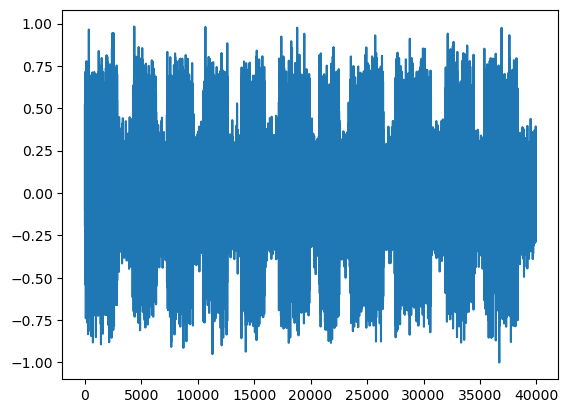

In [4]:
# подгрузка аудиофайла
filename = "signals/phoneNumber0.wav"
fs, audio_signal = wavfile.read(filename)
# график
plt.plot(audio_signal)

In [5]:
fs

8000

Построим спектр.

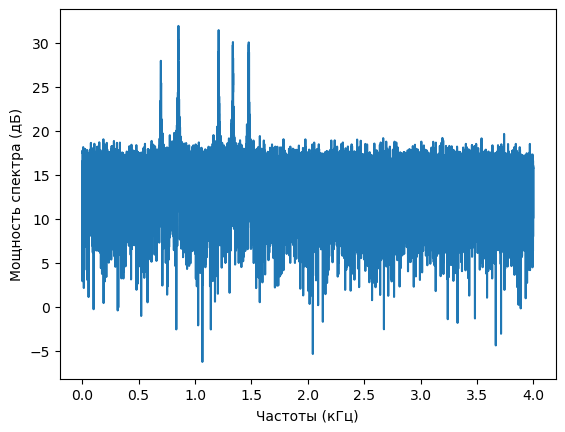

In [7]:
n = len(audio_signal)
signalFFT = fft(audio_signal)
signalFFT = signalFFT[0:int(np.ceil((n+1)/2.0))] #берём половину спектра
signalFFT_mag = np.abs(signalFFT) # Magnitude
 

plt.figure()
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(freqAxis/1000.0, 10*np.log10(signalFFT_mag)) #Power spectrum
plt.xlabel('Частоты (кГц)'); plt.ylabel('Мощность спектра (дБ)');

Построим спектрограмму.

In [11]:
from scipy import signal
window = signal.windows.boxcar(51)

C:\Users\aleksandr\AppData\Local\Temp\1\ipykernel_17204\4085877860.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram


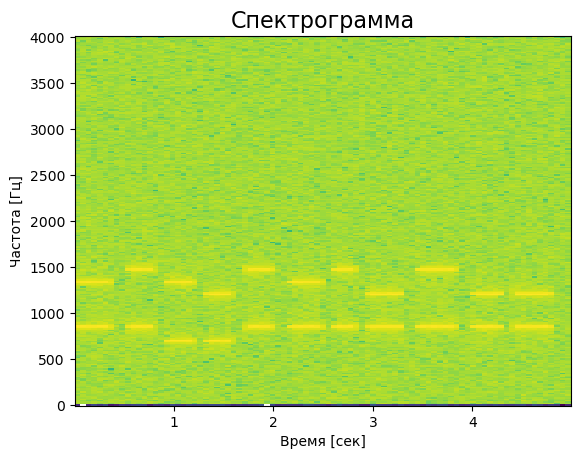

In [12]:
N = 512 #Number of point in the fft
f, t, Sxx = signal.spectrogram(audio_signal,window = signal.windows.boxcar(N), fs = fs,nfft=N)

plt.figure()
plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
#plt.pcolormesh(t, f,Sxx) # Lineal spectrogram
plt.ylabel('Частота [Гц]')
plt.xlabel('Время [сек]')
plt.title('Спектрограмма',size=16);

plt.show()

# ОПФ в задачах классификации

ОПФ для аудио-сигналов часто используют, чтобы выделить признаки аудио-сигналов, которые далее можно эффективно использовать в задачах классификации или синтеза звуков.

Рассмотрим задачу класификации звуков с помощью свёрточных нейронных сетей, которые на вход принимают результат ОПФ.

Требуемые библиотеки:
    
    librosa v0.10
    torch v2.0.0
    
Обучения будет проводить на датасете из 400 аудио-файлов с записью окружающих звуков. В датасете 10 классов, 40 треков на класс, 5 секунд на файл.

Ссылка на датасет: 
https://dataverse.harvard.edu/file.xhtml?persistentId=doi:10.7910/DVN/YDEPUT/B3VNQW&version=2.0

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

Библиотека librosa содержит основные инструменты для работы с аудио-сигналами.

Загрузим сигнал и построим его спектрограмму.

In [15]:
data, fs = librosa.load("dataset/001 - Dog bark/1-30344-A.ogg", sr=44000) 
data.shape
time_sec = (len(data)/fs)
print('Длительность сигнала: ', time_sec)

Длительность сигнала:  5.001


Выведем график сигнала и озвучим сигнал.

In [16]:
import IPython
IPython.display.Audio(data, rate=fs)

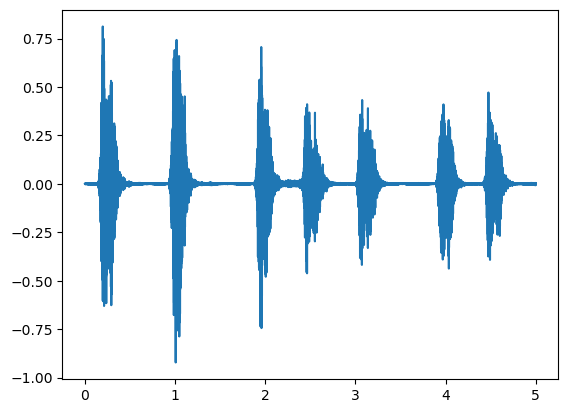

In [17]:
plt.plot(np.arange(0,len(data))/fs,data)

Проделаем ОПФ с помощью метода `librosa.stft()`.
Приведём значения в шкалу дБ, где максимум соответствует 0 дБ.

Метод по умолчанию имеет ширину окна 2048 точек. Расстояние между соседними окнами 512 точек. Также по умолчанию используется окно Хэннинга.

Размер матрицы ОПФ сигнала: (1025, 430)


Text(0.5, 1.0, 'ОПФ')

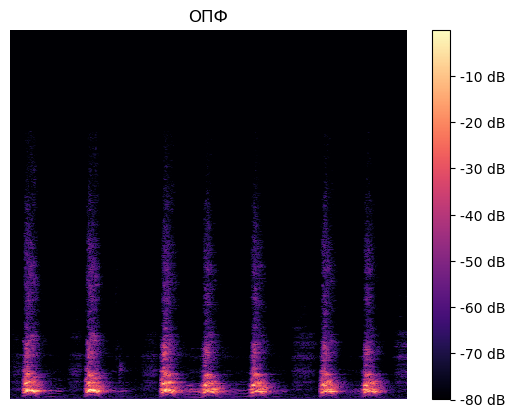

In [18]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
print('Размер матрицы ОПФ сигнала:', freq.shape)
plt.axis('off') # no axis
librosa.display.specshow(freq)
plt.colorbar(format='%+2.0f dB')
plt.title('ОПФ')

Далее, использеум библиотеку glob (библиотека для работу с файловой системой), для подгрузки всех файлов и с указанием класса, которому они принадлежат.

In [19]:
import glob

classes = []
for filepath in glob.iglob('dataset/*'):
    print(filepath)
    classes.append(filepath[8:])

print(classes)


dataset\001 - Dog bark
dataset\002 - Rain
dataset\003 - Sea waves
dataset\004 - Baby cry
dataset\005 - Clock tick
dataset\006 - Person sneeze
dataset\007 - Helicopter
dataset\008 - Chainsaw
dataset\009 - Rooster
dataset\010 - Fire crackling
['001 - Dog bark', '002 - Rain', '003 - Sea waves', '004 - Baby cry', '005 - Clock tick', '006 - Person sneeze', '007 - Helicopter', '008 - Chainsaw', '009 - Rooster', '010 - Fire crackling']


Следующий код позволяет посмотреть на спектрограмму различных классов сигналов.

In [20]:
class_index = 4
files = list(glob.iglob('dataset/'+classes[class_index]+'/*'))
signal, s = librosa.load(files[0], sr=44000)

IPython.display.Audio(signal, rate=fs)

Название класса 005 - Clock tick
Размер матрицы ОПФ сигнала: (1025, 430)


Text(0.5, 1.0, 'ОПФ')

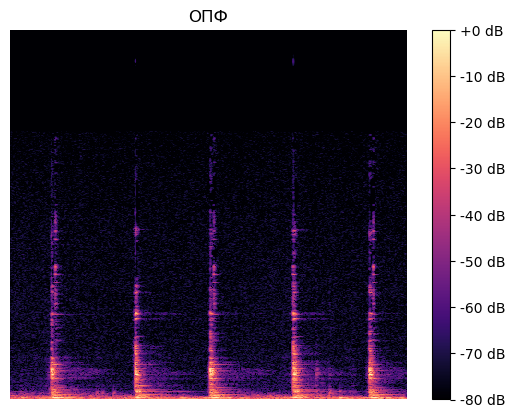

In [21]:
freq = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
print('Название класса', classes[class_index])
print('Размер матрицы ОПФ сигнала:', freq.shape)
plt.axis('off') # no axis
librosa.display.specshow(freq)
plt.colorbar(format='%+2.0f dB')
plt.title('ОПФ')

Формируем массив с аудио данными `data`. Это список, каждый элемент списка является список из numpy массива с аудио-сигналов и класса этого сигнала.

In [22]:
data = []
label_number = 0
for i in classes:
    print("the class = "+i+", the label = "+str(label_number))
    for j in glob.iglob('dataset/'+i+'/*'):
        y, s = librosa.load(j, sr=44000) # может down-sample до 8000 Гц?
        data.append([y,label_number])
        
    label_number = label_number + 1

the class = 001 - Dog bark, the label = 0
the class = 002 - Rain, the label = 1
the class = 003 - Sea waves, the label = 2
the class = 004 - Baby cry, the label = 3
the class = 005 - Clock tick, the label = 4
the class = 006 - Person sneeze, the label = 5
the class = 007 - Helicopter, the label = 6
the class = 008 - Chainsaw, the label = 7
the class = 009 - Rooster, the label = 8
the class = 010 - Fire crackling, the label = 9


In [24]:
print(len(data))
data[41]

400


[array([0.05193608, 0.1158767 , 0.11851896, ..., 0.00105882, 0.00126123,
        0.00052358], dtype=float32),
 1]

Перемешаем данные и сформируем отдельно два массива с сигналами `audio_data` и классами `labels`.

In [25]:
import random
audio_data = []
labels = []
random.shuffle(data)

for i,j in data:
    audio_data.append(i)
    labels.append(j)    

In [26]:
print(labels[0])

7


Из аудио-сигналов извлечём признаки с помощью ОПФ. Спектрограмму векторизуем.
Длительность ограничим 437675 отсчётами.

In [28]:
from tqdm import tqdm 
stft = np.zeros((400, 437675))

for i in tqdm(range(0,400)):
    freq = librosa.amplitude_to_db(np.abs(librosa.stft(audio_data[i])), ref=np.max)
    freq=freq.reshape(-1)
    
    if freq.shape[0]<437675:
        freq = np.array(list(freq) + [0]*(437675-freq.shape[0]))
        stft[i] = freq        
    else:
        stft[i] = freq[:437675]
        
stft = np.array(stft) 
stft.shape

100%|██████████| 400/400 [00:12<00:00, 31.97it/s]


(400, 437675)

Далее требуется подготовить данные для обучения свёрточное нейронной сети в PyTorch

In [29]:
import torch
import torch.nn as nn

Классы закодирем с помощью one-hot encoding.

In [30]:
def encode_labels(labels, num_of_classes): #encoding the classes into a tensor of shape (11) with 0 and 1s.
    num = len(labels)
    target = torch.zeros(num, num_of_classes).float()
    for i, l in enumerate(labels):
        target[i, l] = 1
    return target

In [31]:
target = encode_labels(labels, label_number)
print(target.shape)
print(target[0])

torch.Size([400, 10])
tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])


Признаки сигналов (то есть ОПФ)  нормализуем с помощью MinMaxScaler() из пакета sklearn (приведение значений в интервал от 0 до 1).

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(stft)

normalized_stft = scaler.transform(stft)

print(np.amax(stft))
print(np.amax(normalized_stft))

3.814697265625e-06
1.0000000000000002


Формируем данные для передачи в свёрточную нейронную сеть.

In [33]:
features_convolution = np.reshape(normalized_stft,(400, 1, 1025, -1))
features_convolution.shape

(400, 1, 1025, 427)

Формируем свёрточную нейронную сеть.

Сеть на входе принимает изображение в серых тонах (1 цветовой канал) размера (1025, 427).

1. Свёрточный слой, 16 фильтров размера 3 на 3, шаг 2 пикселя. Функция активация ReLU(). Плюс  max pooling

2. Свёрточный слой, 32 фильтрf размера 3 на 3, шаг 2 пикселя. Функция активация ReLU(). Плюс  max pooling

3. Свёрточный слой, 64 фильтрf размера 3 на 3, шаг 2 пикселя. Функция активация ReLU(). Плюс  max pooling

4. Сглаживание в один массив

5. Полносвязный слой, 64 выходов

6. Полносвязный слой, 10 выходов

Тест модели:

In [54]:
model3 =nn.Sequential(
    nn.Conv2d(1,16,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(16,32,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(32,64,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2)
)

In [55]:
x = torch.rand(size=(2,1,1025,427), dtype=torch.float32)
output = model3(x)
print(f"Input shape: {x.shape}\n")
#print(f"Output:\n{output}\n\nOutput shape: {output.shape}")
print(f"Output shape: {output.shape}")

Input shape: torch.Size([2, 1, 1025, 427])

Output shape: torch.Size([2, 64, 16, 7])


Итоговая модель:

In [36]:
model = nn.Sequential(
    nn.Conv2d(1,16,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(16,32,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(32,64,kernel_size=3,stride=2,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Flatten(),
    nn.Linear(64*112,64),
    nn.Linear(64,10)
)

In [37]:
x = torch.rand(size=(2,1,1025,427), dtype=torch.float32)
x.shape

torch.Size([2, 1, 1025, 427])

In [38]:
output = model(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

Input shape: torch.Size([2, 1, 1025, 427])

Output:
tensor([[-0.0440, -0.0374,  0.0498, -0.1265, -0.0972,  0.0447, -0.0784, -0.0482,
          0.1252, -0.0466],
        [-0.0412, -0.0328,  0.0531, -0.1174, -0.0972,  0.0386, -0.0788, -0.0386,
          0.1317, -0.0407]], grad_fn=<AddmmBackward0>)

Output shape: torch.Size([2, 10])


Для обучения модели будем использовать специальный способ организации данных в `PyTorch` - это `DataLoader`. Это удобно для организации пакетного обучения.

Также потребует метод для деления данных на обучающую и тестовую часть `random_split()`.

In [39]:
from torch.utils.data import random_split
from torch.utils.data import Dataset, DataLoader


class ESC10Data(Dataset):
    def __init__(self, features, targets):
        self.data = features
        self.y = targets
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx], self.y[idx]

In [41]:
#Формируем датасет
dataset = ESC10Data(features_convolution,target)

# Делим на части
TRAIN_SPLIT = 0.8
VAL_SPLIT = 1 - TRAIN_SPLIT

numTrainSamples = int(len(dataset) * TRAIN_SPLIT)
numValSamples = len(dataset) - numTrainSamples
(trainData, valData) = random_split(dataset, [numTrainSamples, numValSamples])

train_loader = DataLoader(trainData, batch_size=16, shuffle=True)
valid_loader = DataLoader(valData, batch_size=16, shuffle=True)

print(len(dataset))
print(len(trainData))
print(len(valData))

400
320
80


In [57]:
if torch.cuda.is_available():
    print("cuda")
    device=torch.device('cuda:0')
else:
    print("cpu")
    device=torch.device('cpu')

model.to(device)

cpu


Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=1, end_dim=-1)
  (10): Linear(in_features=7168, out_features=64, bias=True)
  (11): Linear(in_features=64, out_features=10, bias=True)
)

Используем оптимизатор Adam для осуществления пакетного градиентного спуска.

Функция ошибки - это Кросс-энтропия. 

In [46]:
import torch.optim as optim
from torch.optim import Adam

learning_rate = 5e-3

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
valid_losses = []

In [47]:
numTrainSamples = int(len(dataset) * TRAIN_SPLIT)
numValSamples = len(dataset) - numTrainSamples
(trainData, valData) = random_split(dataset, [numTrainSamples, numValSamples])

train_loader = DataLoader(trainData, batch_size=64, shuffle=True)
valid_loader = DataLoader(valData, batch_size=16, shuffle=True)

In [48]:

epochs = 30
for epoch in tqdm(range(1,epochs+1)):
    model.train()
    batch_losses=[]

    for i, data in enumerate(train_loader):
        x, y = data
        optimizer.zero_grad()
        x = x.to(device, dtype=torch.float32)
        y = y.to(device, dtype=torch.float32)
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        loss.backward()
        batch_losses.append(loss.item())
        optimizer.step()
    train_losses.append(batch_losses)
    print(f'Epoch - {epoch} Train-Loss : {np.mean(train_losses[-1])}')
    model.eval()
    batch_losses=[]
    trace_y = []
    trace_yhat = []
    for i, data in enumerate(valid_loader):
        x, y = data
        x = x.to(device, dtype=torch.float32)
        y = y.to(device, dtype=torch.float32)
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
        trace_y.append(y.cpu().detach().numpy())
        trace_yhat.append(y_hat.cpu().detach().numpy())      
        batch_losses.append(loss.item())
    valid_losses.append(batch_losses)
    trace_y = np.concatenate(trace_y)
    trace_yhat = np.concatenate(trace_yhat)
    accuracy = np.mean(trace_yhat.argmax(axis=1)==trace_y.argmax(axis=1))
    print(f'Epoch - {epoch} Valid-Loss : {np.mean(valid_losses[-1])} Valid-Accuracy : {accuracy}')

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch - 1 Train-Loss : 2.4073575019836424


  3%|▎         | 1/30 [00:10<05:01, 10.40s/it]

Epoch - 1 Valid-Loss : 2.1894639492034913 Valid-Accuracy : 0.1625
Epoch - 2 Train-Loss : 2.1615631580352783


  7%|▋         | 2/30 [00:19<04:35,  9.83s/it]

Epoch - 2 Valid-Loss : 1.9216428995132446 Valid-Accuracy : 0.25
Epoch - 3 Train-Loss : 1.8557024478912354


 10%|█         | 3/30 [00:29<04:21,  9.70s/it]

Epoch - 3 Valid-Loss : 1.5499129056930543 Valid-Accuracy : 0.3125
Epoch - 4 Train-Loss : 1.5030651330947875


 13%|█▎        | 4/30 [00:39<04:16,  9.86s/it]

Epoch - 4 Valid-Loss : 1.6049673557281494 Valid-Accuracy : 0.4625
Epoch - 5 Train-Loss : 1.381331491470337


 17%|█▋        | 5/30 [00:49<04:04,  9.79s/it]

Epoch - 5 Valid-Loss : 1.2111433029174805 Valid-Accuracy : 0.575
Epoch - 6 Train-Loss : 1.1849610567092896


 20%|██        | 6/30 [00:58<03:54,  9.79s/it]

Epoch - 6 Valid-Loss : 1.0624979615211487 Valid-Accuracy : 0.6125
Epoch - 7 Train-Loss : 0.9772011160850524


 23%|██▎       | 7/30 [01:08<03:41,  9.62s/it]

Epoch - 7 Valid-Loss : 1.163449490070343 Valid-Accuracy : 0.5625
Epoch - 8 Train-Loss : 0.9359971523284912


 27%|██▋       | 8/30 [01:18<03:34,  9.74s/it]

Epoch - 8 Valid-Loss : 1.2292681217193604 Valid-Accuracy : 0.6125
Epoch - 9 Train-Loss : 0.9160755276679993


 30%|███       | 9/30 [01:28<03:27,  9.88s/it]

Epoch - 9 Valid-Loss : 1.0855121731758117 Valid-Accuracy : 0.5625
Epoch - 10 Train-Loss : 0.8377076625823975


 33%|███▎      | 10/30 [01:38<03:16,  9.84s/it]

Epoch - 10 Valid-Loss : 1.3647710800170898 Valid-Accuracy : 0.5375
Epoch - 11 Train-Loss : 0.8430227756500244


 37%|███▋      | 11/30 [01:47<03:05,  9.78s/it]

Epoch - 11 Valid-Loss : 0.8964713931083679 Valid-Accuracy : 0.65
Epoch - 12 Train-Loss : 0.7460349082946778


 40%|████      | 12/30 [01:57<02:52,  9.61s/it]

Epoch - 12 Valid-Loss : 1.0414895415306091 Valid-Accuracy : 0.575
Epoch - 13 Train-Loss : 0.6601394534111023


 43%|████▎     | 13/30 [02:06<02:44,  9.69s/it]

Epoch - 13 Valid-Loss : 0.8293307304382325 Valid-Accuracy : 0.6625
Epoch - 14 Train-Loss : 0.6186359167098999


 47%|████▋     | 14/30 [02:16<02:34,  9.64s/it]

Epoch - 14 Valid-Loss : 0.9624767184257508 Valid-Accuracy : 0.6375
Epoch - 15 Train-Loss : 0.5161272048950195


 50%|█████     | 15/30 [02:25<02:22,  9.52s/it]

Epoch - 15 Valid-Loss : 0.8018430948257447 Valid-Accuracy : 0.6625
Epoch - 16 Train-Loss : 0.42557133436203004


 53%|█████▎    | 16/30 [02:35<02:12,  9.48s/it]

Epoch - 16 Valid-Loss : 0.8211593508720398 Valid-Accuracy : 0.65
Epoch - 17 Train-Loss : 0.42979270219802856


 57%|█████▋    | 17/30 [02:44<02:03,  9.48s/it]

Epoch - 17 Valid-Loss : 0.9878315567970276 Valid-Accuracy : 0.7
Epoch - 18 Train-Loss : 0.401543653011322


 60%|██████    | 18/30 [02:53<01:53,  9.45s/it]

Epoch - 18 Valid-Loss : 0.7353019624948501 Valid-Accuracy : 0.725
Epoch - 19 Train-Loss : 0.3279249906539917


 63%|██████▎   | 19/30 [03:03<01:43,  9.43s/it]

Epoch - 19 Valid-Loss : 0.7444918572902679 Valid-Accuracy : 0.7125
Epoch - 20 Train-Loss : 0.246746027469635


 67%|██████▋   | 20/30 [03:12<01:34,  9.48s/it]

Epoch - 20 Valid-Loss : 0.782222855091095 Valid-Accuracy : 0.725
Epoch - 21 Train-Loss : 0.20741620361804963


 70%|███████   | 21/30 [03:22<01:25,  9.46s/it]

Epoch - 21 Valid-Loss : 0.8515521883964539 Valid-Accuracy : 0.75
Epoch - 22 Train-Loss : 0.22966238260269164


 73%|███████▎  | 22/30 [03:33<01:20, 10.10s/it]

Epoch - 22 Valid-Loss : 0.757707953453064 Valid-Accuracy : 0.7625
Epoch - 23 Train-Loss : 0.2837817907333374


 77%|███████▋  | 23/30 [03:56<01:37, 13.98s/it]

Epoch - 23 Valid-Loss : 1.0929709076881409 Valid-Accuracy : 0.7125
Epoch - 24 Train-Loss : 0.2484101951122284


 80%|████████  | 24/30 [04:09<01:21, 13.63s/it]

Epoch - 24 Valid-Loss : 1.0923390626907348 Valid-Accuracy : 0.7125
Epoch - 25 Train-Loss : 0.2761180251836777


 83%|████████▎ | 25/30 [04:19<01:02, 12.48s/it]

Epoch - 25 Valid-Loss : 0.9951898694038391 Valid-Accuracy : 0.7625
Epoch - 26 Train-Loss : 0.24762664288282393


 87%|████████▋ | 26/30 [04:29<00:46, 11.71s/it]

Epoch - 26 Valid-Loss : 0.9693858623504639 Valid-Accuracy : 0.675
Epoch - 27 Train-Loss : 0.24020841121673583


 90%|█████████ | 27/30 [04:39<00:33, 11.15s/it]

Epoch - 27 Valid-Loss : 0.7673191905021668 Valid-Accuracy : 0.7625
Epoch - 28 Train-Loss : 0.21140844821929933


 93%|█████████▎| 28/30 [04:48<00:21, 10.69s/it]

Epoch - 28 Valid-Loss : 0.8301330864429474 Valid-Accuracy : 0.775
Epoch - 29 Train-Loss : 0.1920305073261261


 97%|█████████▋| 29/30 [04:59<00:10, 10.53s/it]

Epoch - 29 Valid-Loss : 0.9028090119361878 Valid-Accuracy : 0.6875
Epoch - 30 Train-Loss : 0.16819221824407576


100%|██████████| 30/30 [05:08<00:00, 10.30s/it]

Epoch - 30 Valid-Loss : 0.8812855780124664 Valid-Accuracy : 0.775


In [49]:
trace_y.argmax(axis=1)

array([1, 7, 7, 6, 8, 1, 3, 0, 6, 5, 5, 8, 1, 9, 5, 1, 1, 2, 6, 9, 1, 3,
       8, 4, 1, 9, 9, 5, 4, 5, 1, 9, 7, 2, 7, 1, 0, 7, 9, 5, 5, 5, 0, 2,
       0, 1, 6, 7, 5, 5, 1, 6, 5, 2, 0, 6, 7, 0, 7, 1, 5, 0, 1, 5, 8, 3,
       8, 0, 6, 0, 7, 1, 2, 6, 8, 7, 4, 6, 2, 2], dtype=int64)

In [50]:
trace_yhat.argmax(axis=1)

array([1, 2, 7, 6, 8, 6, 3, 4, 6, 5, 5, 8, 1, 1, 5, 1, 1, 2, 6, 4, 1, 3,
       8, 4, 1, 4, 9, 5, 9, 5, 1, 9, 1, 2, 7, 1, 0, 7, 9, 5, 9, 5, 0, 2,
       8, 1, 6, 7, 5, 5, 1, 6, 5, 2, 0, 6, 7, 6, 7, 7, 5, 0, 1, 5, 8, 3,
       8, 4, 6, 0, 7, 9, 1, 7, 8, 2, 4, 6, 7, 2], dtype=int64)

In [51]:
PATH = 'D:/Temp/inputs.t'

In [52]:
torch.save(model.state_dict(), PATH)

RuntimeError: Parent directory D:/Temp does not exist.

In [ ]:
model.load_state_dict(torch.load(PATH))
model.eval()